![Astrofisica Computacional](../logo.png)

---
## 01. Data Analysis. Supernovae


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this worksheet, we use a real ligth curve of a supernova to illustrate data analysis and the identification of the class of the event according to a theoretical model. 

---

### A Real Supernova Lightcurve

The **A**merican **A**ssociation of **V**ariable **S**tars **O**bservers (**AAVSO**) collects information about variable stars, including nova and supernova events. From its webpage,

https://www.aavso.org

it is possible to download the photometric data (lightcurves) of many objects. We will illustrate the data analysis using the supernova SN 2013E, located in the constellation Antlia. The data is given in a .txt file with comma separated values.

#### Reading the dataset
The dataset is a .txt file and we will use pandas to read it and take a look to its header and first elements.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('aavsodata_5fea06dd7e52f-SN2013E.txt')

df.head()

,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,...,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
0,2.456300e+06,14.768,0.024,NaN,B,BHQ,NaN,ENSEMBLE,147,10401GAV,...,NaN,15.236,NaN,SN 2013E,VSS,STD,NaN,NaN,NaN,NaN
1,2.456300e+06,14.370,0.022,NaN,R,BHQ,NaN,ENSEMBLE,147,10401GAV,...,NaN,14.234,NaN,SN 2013E,VSS,STD,NaN,NaN,NaN,NaN
2,2.456300e+06,14.319,0.049,NaN,I,BHQ,NaN,ENSEMBLE,147,10401GAV,...,NaN,13.839,NaN,SN 2013E,VSS,STD,NaN,NaN,NaN,NaN
3,2.456300e+06,14.588,0.017,NaN,V,BHQ,NaN,ENSEMBLE,147,10401GAV,...,NaN,14.634,NaN,SN 2013E,VSS,STD,NaN,NaN,NaN,NaN
4,2.456303e+06,14.3,NaN,NaN,Vis.,PEX,NaN,139,147,10401GBD,...,NaN,NaN,NaN,SN 2013E,RASNZ-VSS,STD,NaN,NaN,NaN,NaN


The `.describe()` attribute summarize the content of the dataset. Note that the column 'Magnitude' is not listed because its values are understood as string type variables.

In [3]:
df.describe()

,JD,Uncertainty,HQuncertainty,Transfomed,Airmass,Cmag,Kmag,HJD,Grouping Method,ADS Reference,Digitizer,Credit
count,1.710000e+02,157.000000,0.0,157.000000,157.00000,3.000000e+00,157.000000,0.0,0.0,0.0,0.0,0.0
mean,2.456343e+06,0.060401,NaN,0.503185,1.20386,1.352000e+01,13.943777,NaN,NaN,NaN,NaN,NaN
std,3.446337e+01,0.044672,NaN,0.501590,0.22941,2.175584e-15,0.753353,NaN,NaN,NaN,NaN,NaN
min,2.456300e+06,0.007000,NaN,0.000000,1.00000,1.352000e+01,13.016000,NaN,NaN,NaN,NaN,NaN
25%,2.456317e+06,0.030000,NaN,0.000000,1.01300,1.352000e+01,13.279000,NaN,NaN,NaN,NaN,NaN
50%,2.456334e+06,0.050000,NaN,1.000000,1.13000,1.352000e+01,13.350000,NaN,NaN,NaN,NaN,NaN
75%,2.456361e+06,0.080000,NaN,1.000000,1.31000,1.352000e+01,14.450000,NaN,NaN,NaN,NaN,NaN
max,2.456483e+06,0.288000,NaN,1.000000,2.06500,1.352000e+01,15.281000,NaN,NaN,NaN,NaN,NaN


The dataframe includes data from 171 observations of the supernova. 

The features (columns) include

**JD** : Julian Date \
**Magnitude** \
**Uncertainty** \
**Band**  

---

We will work only with the data in the *V* band (visual). Therefore, we will select the relevant samples by imposing a filter to the dataframe,

In [4]:
df[df['Band']=='V']

,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,...,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
3,2.456300e+06,14.588,0.017,NaN,V,BHQ,NaN,ENSEMBLE,147,10401GAV,...,NaN,14.634,NaN,SN 2013E,VSS,STD,NaN,NaN,NaN,NaN
6,2.456304e+06,14.165,0.008,NaN,V,NLX,NaN,Ensemble,144,10401FZM,...,NaN,14.440,NaN,PSN J10000552-3414013,AAVSO,STD,NaN,NaN,NaN,NaN
7,2.456304e+06,14.119,0.134,NaN,V,HKEB,NaN,000-BKV-514,000-BKV-513,10403OWK,...,13.52,13.316,NaN,SN 2013E,AAVSO,STD,NaN,NaN,NaN,NaN
9,2.456306e+06,14.042,0.054,NaN,V,HKEB,NaN,000-BKV-514,000-BKV-513,10403OWK,...,13.52,13.316,NaN,SN 2013E,AAVSO,STD,NaN,NaN,NaN,NaN
11,2.456307e+06,14.006,0.007,NaN,V,NLX,NaN,Ensemble,144,10401FZM,...,NaN,14.440,NaN,PSN J10000552-3414013,AAVSO,STD,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.456435e+06,17.0,0.100,NaN,V,NLX,NaN,Ensemble,144,10401FZM,...,NaN,14.440,NaN,SN 2013E,AAVSO,STD,NaN,NaN,NaN,NaN
167,2.456436e+06,17.5,0.120,NaN,V,NLX,NaN,Ensemble,144,10401FZM,...,NaN,14.440,NaN,SN 2013E,AAVSO,STD,NaN,NaN,NaN,NaN
168,2.456441e+06,17.3,0.100,NaN,V,NLX,NaN,Ensemble,144,10401FZM,...,NaN,14.430,NaN,SN 2013E,AAVSO,STD,NaN,NaN,NaN,NaN
169,2.456453e+06,17.2,0.120,NaN,V,NLX,NaN,Ensemble,144,10401FZM,...,NaN,14.430,NaN,SN 2013E,AAVSO,STD,NaN,NaN,NaN,NaN


The lightcurve will be defined using just the Julian Date and the Magnitude in the V band. These features are included in the definition of a new dataframe,

In [5]:
lightcurve_df = df[df['Band']=='V'][['JD', 'Magnitude']]
lightcurve_df

,JD,Magnitude
3,2.456300e+06,14.588
6,2.456304e+06,14.165
7,2.456304e+06,14.119
9,2.456306e+06,14.042
11,2.456307e+06,14.006
...,...,...
166,2.456435e+06,17.0
167,2.456436e+06,17.5
168,2.456441e+06,17.3
169,2.456453e+06,17.2


Note that we are left with only 121 datapoints. The type of the variables in this dataframe are

In [6]:
lightcurve_df.dtypes

JD           float64
Magnitude     object
dtype: object

Note that the 'Magnitude' column is not considered as a numerical variable. Then, we will use the function `pandas.to_numeric` to transform this column into float point numbers.

In [7]:
lightcurve_df['Magnitude'] = pd.to_numeric(lightcurve_df['Magnitude'], downcast='float')
lightcurve_df

,JD,Magnitude
3,2.456300e+06,14.588000
6,2.456304e+06,14.165000
7,2.456304e+06,14.119000
9,2.456306e+06,14.042000
11,2.456307e+06,14.006000
...,...,...
166,2.456435e+06,17.000000
167,2.456436e+06,17.500000
168,2.456441e+06,17.299999
169,2.456453e+06,17.200001


In [8]:
lightcurve_df.dtypes

JD           float64
Magnitude    float32
dtype: object

Now, the description of the dataframe gives the complete information about the magnitudes.

In [9]:
lightcurve_df.describe()

,JD,Magnitude
count,1.210000e+02,121.000000
mean,2.456347e+06,15.229074
std,3.678333e+01,1.114919
min,2.456300e+06,13.794000
25%,2.456322e+06,14.452000
50%,2.456334e+06,14.880000
75%,2.456363e+06,16.059999
max,2.456483e+06,17.929001


#### Ploting the Data

It is possible to use `pyplot` to plot directly from the dataframe. Note that we invert the y-axis (because magnitude is small for brigth objects).

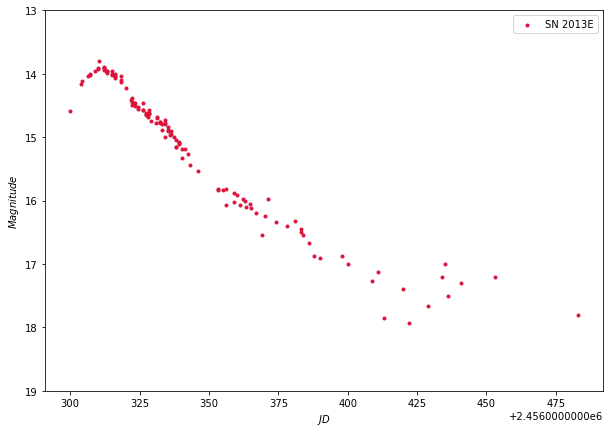

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.', label=r'SN 2013E')
ax.set_xlabel(r'$JD$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, 13)
plt.legend()
plt.show()

---
### Supernova Templates

The astrophysicist Peter Nugent, has developed a series of supernova templates based on theoretical models and observational data. These synthetic datasets are available at

https://c3.lbl.gov/nugent/nugent_templates.html

Photometric data included in this page correspond to the templates for supernovas of the following types

- Type Ia Branch-normal (Bands: UBVRIJHK)
- Type Ia 1991T-like (Bands: UBVRI)
- Type Ia 1991bg-like (Bands: UBVRI)
- Type Ib/c (Bands: UBVRI)
- Type Ib/c high velocity - Hypernovae (Bands: V)
- Type IIP (Bands: V)
- Type IIL (Bands: V)
- Type IIn (Bands: V)

The datasets have no headers, the values are separated with spaces and the time is set to 0.0 at the explosion (maximum of the V-band magnitude) .

We present here four of Nugent's templates:

In [11]:
# The delimiters in these file are spaces 
# There is no header in the file 
df_1a = pd.read_csv('sn1a_lc.v1.2.dat', header=None, delimiter=r'\s+', names=['days','U','B','V','R','I','J','H','K'] ) 
df_1bc = pd.read_csv('sn1bc_lc.v1.1.dat', header=None, delimiter=r'\s+', names=['days','U','B','V','R','I'] ) 
df_2p = pd.read_csv('sn2p_lc.v1.2.dat', header=None, delimiter=r'\s+', names=['days','V'] ) 
df_2n = pd.read_csv('sn2l_lc.v1.2.dat', header=None, delimiter=r'\s+', names=['days','V'] ) 

The template for supernovas SNIa include the bands UBVRIJHK. Hence, we will define a new dataframe with only two columns, 'days' and 'V',

In [12]:
template_df_1a = df_1a[['days','V']]
template_df_1a.describe()

,days,V
count,91.00000,91.000000
mean,25.00000,2.161209
std,26.41338,5.197773
min,-20.00000,0.050000
25%,2.50000,0.555000
50%,25.00000,1.730000
75%,47.50000,2.590000
max,70.00000,50.000000


Similarly, the template for supernovas SNIb/c include the bands UBVRI. Hence, we will define a new dataframe with only two columns, 'days' and 'V',

In [13]:
template_df_1bc = df_1bc[['days','V']]
template_df_1bc.describe()

,days,V
count,85.000000,85.000000
mean,27.000000,1.206753
std,24.681302,1.046101
min,-15.000000,-0.391000
25%,6.000000,0.180000
50%,27.000000,1.418000
75%,48.000000,2.126000
max,69.000000,3.342000


Templates for supernovas SNIIp and SNIIn only have information in the 'V' band. Now, we will look at the behavior of these templates,

In [15]:
df_2p.describe()

,days,V
count,12.000000,12.000000
mean,63.666667,4.004167
std,115.248611,7.234496
min,-11.000000,0.000000
25%,-1.250000,0.602500
50%,17.500000,1.115000
75%,81.250000,4.045000
max,400.000000,26.000000


In [16]:
df_2n.describe()

,days,V
count,12.000000,12.000000
mean,63.666667,4.950833
std,115.248611,7.004978
min,-11.000000,0.000000
25%,-1.250000,1.312500
50%,17.500000,3.285000
75%,81.250000,5.160000
max,400.000000,26.000000


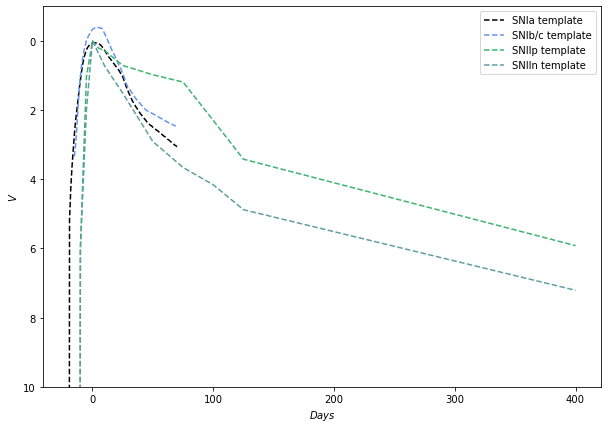

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(template_df_1a['days'], template_df_1a['V'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days'], template_df_1bc['V'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')
ax.plot(df_2p['days'], df_2p['V'], '--', 
        color='mediumseagreen' , label=r'SNIIp template')
ax.plot(df_2n['days'], df_2n['V'], '--', 
        color='cadetblue' , label=r'SNIIn template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$V$')
ax.set_ylim(10, -1)
plt.legend()
plt.show()

#### Template Fit

Now, we will plot the supernova data and templates together,

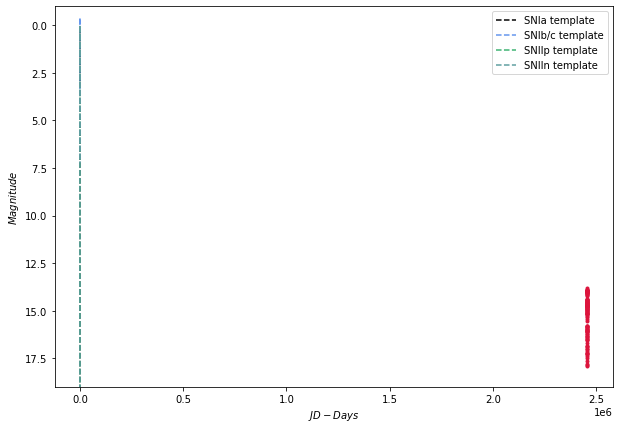

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days'], template_df_1bc['V'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')
ax.plot(df_2p['days'], df_2p['V'], '--', 
        color='mediumseagreen' , label=r'SNIIp template')
ax.plot(df_2n['days'], df_2n['V'], '--', 
        color='cadetblue' , label=r'SNIIn template')

ax.set_xlabel(r'$JD - Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, -1)

plt.legend()
plt.show()

Clearly the time scale is not appropiate. Since the SN data is given in a Julian Date timescale, we will rescale so that the maximum of brightness of the observational data occurs at day 0.0. 

First, we locate the maximum brightness (i.e. the minimum of Magnitude)

In [19]:
Magnitude_min = lightcurve_df['Magnitude'].min()
Magnitude_min

13.794

The corresponding sample is

In [20]:
lightcurve_df[lightcurve_df['Magnitude']==Magnitude_min]

,JD,Magnitude
21,2.456310e+06,13.794


The index corresponding to this sample is

In [21]:
index_min = lightcurve_df[lightcurve_df['Magnitude']==Magnitude_min].index.tolist()
index_min

[21]

and the corresponding Julian Date is

In [22]:
JD_min = lightcurve_df['JD'][index_min[0]]
JD_min

2456310.225428

The rescaling of the time information gives

In [23]:
lightcurve_df['JD'] = lightcurve_df['JD']- JD_min
lightcurve_df

,JD,Magnitude
3,-10.216698,14.588000
6,-6.194598,14.165000
7,-6.005808,14.119000
9,-3.954258,14.042000
11,-3.167077,14.006000
...,...,...
166,124.693992,17.000000
167,125.762677,17.500000
168,130.757079,17.299999
169,142.716243,17.200001


Now, we plot again,

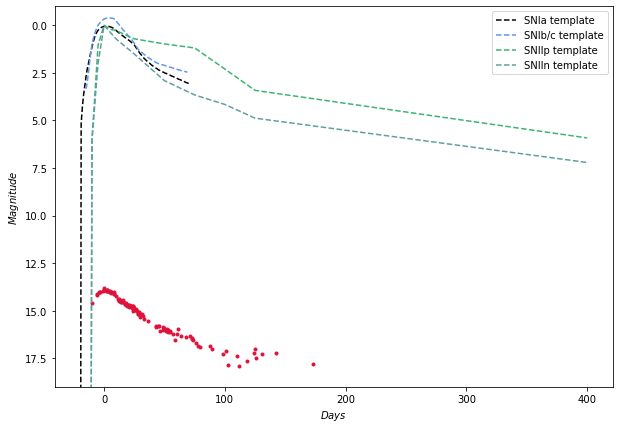

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days'], template_df_1bc['V'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')
ax.plot(df_2p['days'], df_2p['V'], '--', 
        color='mediumseagreen' , label=r'SNIIp template')
ax.plot(df_2n['days'], df_2n['V'], '--', 
        color='cadetblue' , label=r'SNIIn template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, -1)

plt.legend()
plt.show()

Now, we will re-scale the templates  using the maximum brightness of the lightcurve (i.e. the minimum Magnitude),

In [25]:
template_df_1a['V_calib'] = template_df_1a['V'] + Magnitude_min
template_df_1bc['V_calib'] = template_df_1bc['V'] + Magnitude_min
df_2p['V_calib'] = df_2p['V'] + Magnitude_min
df_2n['V_calib'] = df_2n['V'] + Magnitude_min

In [26]:
template_df_1a

,days,V,V_calib
0,-20.0,50.00,63.794
1,-19.0,5.18,18.974
2,-18.0,4.30,18.094
3,-17.0,3.67,17.464
4,-16.0,3.19,16.984
...,...,...,...
86,66.0,2.94,16.734
87,67.0,2.98,16.774
88,68.0,3.01,16.804
89,69.0,3.03,16.824


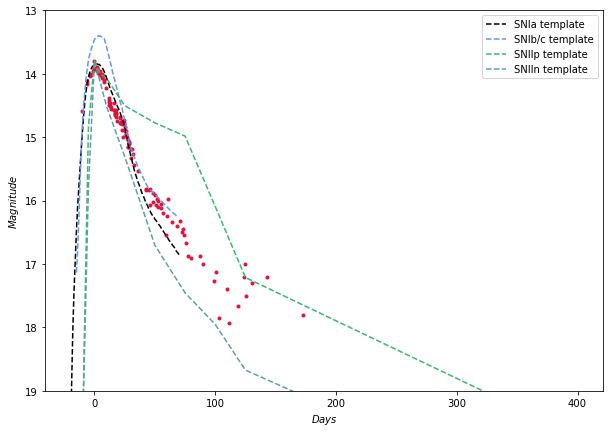

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V_calib'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days'], template_df_1bc['V_calib'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')
ax.plot(df_2p['days'], df_2p['V_calib'], '--', 
        color='mediumseagreen' , label=r'SNIIp template')
ax.plot(df_2n['days'], df_2n['V_calib'], '--', 
        color='cadetblue' , label=r'SNIIn template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, 13)

plt.legend()
plt.show()

From the plots above we recognize that

- The SNIIp template does not fall sufficiently fast to fit the data.
- The SNIIn template does fall too fast to fit the data

Hence, the supernova SN 2013E may be of type SNIa or SNIb/c.

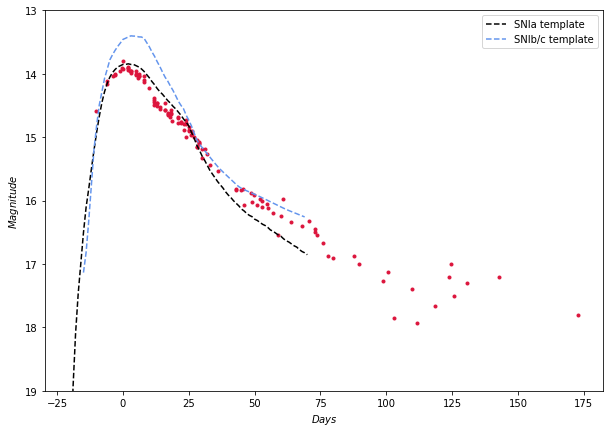

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V_calib'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days'], template_df_1bc['V_calib'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, 13)

plt.legend()
plt.show()

The SNIb/c template needs to be adjusted to fit the maximum value both in value and time. The value of the maximum of this template is

In [28]:
template_1bc_min = template_df_1bc['V_calib'].min()
template_1bc_min

13.402999671936035

The recalibration of the light curve gives

In [29]:
template_df_1bc['V_calib2'] = template_df_1bc['V_calib'] + (Magnitude_min- template_1bc_min)

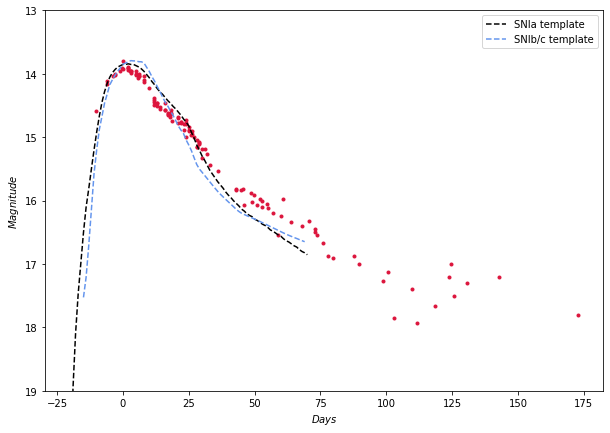

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V_calib'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days'], template_df_1bc['V_calib2'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, 13)

plt.legend()
plt.show()

Now, we shift the template in time by visual inspection to obtain 

In [31]:
template_df_1bc['days_calib2'] = template_df_1bc['days'] - 2

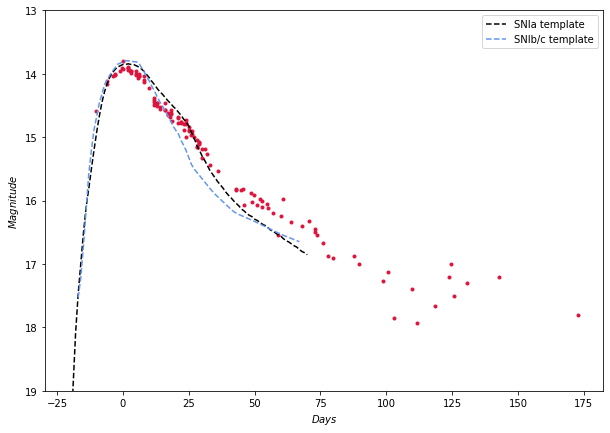

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V_calib'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days_calib2'], template_df_1bc['V_calib2'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, 13)

plt.legend()
plt.show()

Finally, using again a visual inspection of the plot, we will shift the templates in the brightness axis to obtain a better fit

In [33]:
template_df_1bc['V_calib2'] = template_df_1bc['V_calib'] + (Magnitude_min- template_1bc_min)+0.1
template_df_1a['V_calib2'] = template_df_1a['V_calib'] +0.07

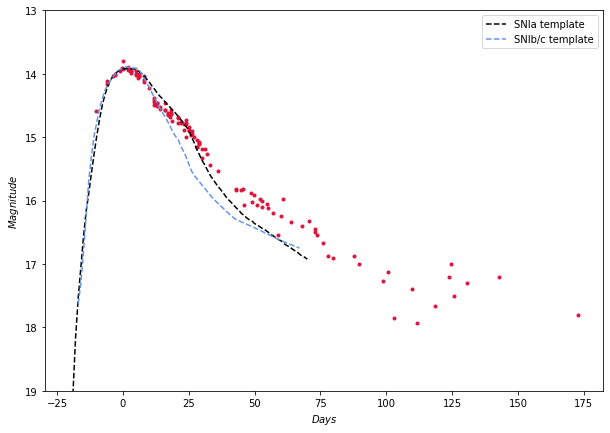

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lightcurve_df['JD'], lightcurve_df['Magnitude'],  color='crimson', marker='.')

ax.plot(template_df_1a['days'], template_df_1a['V_calib2'],  '--', 
        color='black', label=r'SNIa template')
ax.plot(template_df_1bc['days_calib2'], template_df_1bc['V_calib2'],  '--', 
        color='cornflowerblue', label=r'SNIb/c template')

ax.set_xlabel(r'$Days$')
ax.set_ylabel(r'$Magnitude$')
ax.set_ylim(19, 13)

plt.legend()
plt.show()

From this image, the best fit corresponds to the SNIa template, although it is not perfect for late times. In the literature, supernova SN 2013E is classified with the type SNIa.

---

**Is there a better method to make the fit of observational data to the templates and to identify the tyoe of a supernova event?**

For example, a machine learning approach to solve this kind of problem was presented in


Michelle Lochner, Jason D. McEwen, Hiranya V. Peiris, Ofer Lahav, and Max K. Winter. *PHOTOMETRIC SUPERNOVA CLASSIFICATION WITH MACHINE LEARNING*.  ApJS 225 31 (2016)


https://iopscience.iop.org/article/10.3847/0067-0049/225/2/31